## Install and import

In [ ]:
!pip install -r requirements.txt

In [36]:
import random
import numpy as np
from datasets import load_dataset

## Base dataset

For classification model training, due to limited computation resourses was desided to take some big base dataset, and create a smaller variation. As a base dataset was chosen Animal Species Classification - V3, which contains images of 15 animal classes, sorted into train, validation, test and some other forlders.    

For this task was decided to use only 12 classes from 15, so such classes as beetle, butterfly and spider were removed.    
Each image from train, validation and test forlders are of shape 256x256 (3 channels) and are normalized.

Link: https://www.kaggle.com/datasets/utkarshsaxenadn/animal-image-classification-dataset

In [10]:
# load locally saved Animal Species Classification - V3 with folders train, validation, test and 12 classes
asc = load_dataset("dataset")

Resolving data files:   0%|          | 0/24000 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/1400 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/2107 [00:00<?, ?it/s]

In [12]:
# display base dataset structure
asc

DatasetDict({
    train: Dataset({
        features: ['image', 'label'],
        num_rows: 24000
    })
    validation: Dataset({
        features: ['image', 'label'],
        num_rows: 1400
    })
    test: Dataset({
        features: ['image', 'label'],
        num_rows: 2107
    })
})

In [24]:
#animal classes for classification task
labels = asc["train"].features["label"].names
#create corelletion between numerical labels and class names
idx2label = {idx: label for idx, label in enumerate(labels)}

labels

['Cat',
 'Cow',
 'Dog',
 'Elephant',
 'Gorilla',
 'Hippo',
 'Lizard',
 'Monkey',
 'Mouse',
 'Panda',
 'Tiger',
 'Zebra']

Class: Elephant


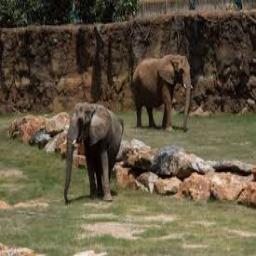

In [47]:
#display random dataset train folder image and label
random_idx = random.randint(0,len(asc['train']))
label = idx2label[asc['train'][random_idx]['label']]
image = asc['train'][random_idx]['image']
print(f"Class: {label}")
image

In [49]:
#ensure that image size is 256x256
print(f'Image shape {np.array(image).shape}')

Image shape (256, 256, 3)


## Custom dataset

Due to limited computation resorses the custom dataset for the task was created as a part of Animal Species Classification - V3.
Custom dataset also contains train, validation and test folders, but anout of data in them is significantly less.

In [ ]:
# This fubction was used to create custom dataset 'new_dataset'. 
# It is set that in train folder there must be 100 images of each class - 1200 images total
# In validation and tr=est folders - 10 images per class - 120 images in each folder total

# import os
# import random
# import shutil

# original_dataset_path = 'dataset'
# new_dataset_path = 'new_dataset'

# train_images_per_class = 100
# val_test_images_per_class = 10

# for split in ['train', 'validation', 'test']:
#     original_split_path = os.path.join(original_dataset_path, split)
#     new_split_path = os.path.join(new_dataset_path, split)
    
#     os.makedirs(new_split_path, exist_ok=True)
    
#     if split == 'train':
#         images_per_class = train_images_per_class
#     else:
#         images_per_class = val_test_images_per_class
    
#     for class_name in os.listdir(original_split_path):
#         class_folder_path = os.path.join(original_split_path, class_name)
        
#         if os.path.isdir(class_folder_path):
#             image_files = [f for f in os.listdir(class_folder_path) if os.path.isfile(os.path.join(class_folder_path, f))]
            
#             sampled_images = random.sample(image_files, min(len(image_files), images_per_class))
            
#             new_class_folder_path = os.path.join(new_split_path, class_name)
#             os.makedirs(new_class_folder_path, exist_ok=True)
            
#             for image in sampled_images:
#                 original_image_path = os.path.join(class_folder_path, image)
#                 new_image_path = os.path.join(new_class_folder_path, image)
#                 shutil.copy(original_image_path, new_image_path)
            
#             print(f"Processed {class_name} in {split} split.")
#         else:
#             print(f"{class_name} is not a directory.")

# print("Dataset creation completed.")

In order to check is it possible to train model locally on more data, also was created a bit larger dataset:    
- 200 images per class - 2400 total     
- 100 images per class for validation and test - 1200 for each folder

In [59]:
# load custom dataset
dataset = load_dataset("new_dataset")

Resolving data files:   0%|          | 0/2400 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/1200 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/1075 [00:00<?, ?it/s]

In [61]:
dataset

DatasetDict({
    train: Dataset({
        features: ['image', 'label'],
        num_rows: 2400
    })
    validation: Dataset({
        features: ['image', 'label'],
        num_rows: 1200
    })
    test: Dataset({
        features: ['image', 'label'],
        num_rows: 1075
    })
})

The data is stored in the exact same way as in base dataset

In [71]:
#animal classes for classification task with custom dataset
labels = dataset["train"].features["label"].names
#create corelletion between numerical labels and class names
idx2label = {idx: label for idx, label in enumerate(labels)}

#labels are the same
labels

['Cat',
 'Cow',
 'Dog',
 'Elephant',
 'Gorilla',
 'Hippo',
 'Lizard',
 'Monkey',
 'Mouse',
 'Panda',
 'Tiger',
 'Zebra']

Class: Hippo


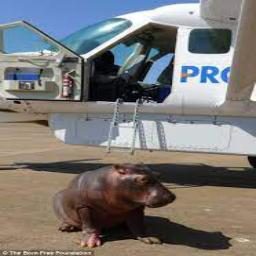

In [75]:
#display random custom dataset train folder image and label
random_idx = random.randint(0,len(dataset['train']))
label = idx2label[dataset['train'][random_idx]['label']]
image = dataset['train'][random_idx]['image']
print(f"Class: {label}")
image

In [77]:
#ensure that image size is still 256x256
print(f'Image shape {np.array(image).shape}')

Image shape (256, 256, 3)
